Objective
Data Visualization
Let's practice what we have learned so far and visualize some data!

In order to validate this checkpoint you must accomplish the following tasks:

Preprocessing phase:
After importing the dataset using Pandas start by showing the head of the dataset then some general information about the data columns and values.

As a next step, apply what you have learned in the course to preprocess your data: find missing information and replace it with the appropriate values.

Verify that your data is ready to be treated.

2. Visualization phase:

Start by studying the distribution of the most important features based on your understanding of the dataset and the problem.

Visualize the correlation between Sex and Age in a plot of your choosing. The visualized plot should give us obvious deductions concerning the importance of age and sex in the survival of the individuals.

Pick two other features and study their impact on the survival of the individuals.

Have a look at this function:

def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

Try running the function, analyze what it does exactly and its utilities. Write a paragraph describing your analysis (the paragraph should be in English).

Use the groupby function combined with the mean() to view the relation between Pclass and survived 

As a final step, try to drop the useless columns (such as Names).

We dropped the column Names because we evaluated it to be useless. But that's ultimately not the case because we can create a very useful feature from Names.

Your task now is to create a new column called Title which contains the appropriate Title for each individual. Hint: Extract the title from the column Names.

Visualize the correlation between Title and other features(e.g Sex, Fare, Age).

As you have seen, there are a lot of titles which makes the feature very impractical. Let's try to group these titles into more useful ones.

Hint: Use the following dictionary

Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer”,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty"

                  "the Countess": "Royalty",

                    "Dona":       "Royalty”,

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs

                    "Master" :    "Master"

                    }

Let's visualize the same correlations using these new titles now.

Finally, use the Parch and the SibSp columns to create a more useful feature, let's call it FamilySize.

Use what you have learned so far to conclude if this feature is useful or not.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# importing csv file

In [82]:
titanic = pd.read_csv("C:\\Users\\VALUEDSEED\\Downloads\\titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [83]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# checking the missing values

In [84]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Replacing missing values

In [85]:
titanic["Age"].fillna(titanic["Age"].mean(), inplace = True)

In [86]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [87]:
titanic["Cabin"].fillna("B42", inplace = True)

In [88]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [89]:
titanic["Embarked"].fillna("B", inplace = True)

In [90]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Data Visualisation Stage

In [91]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B42,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B42,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B42,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B42,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


# Checking the unique values for columns

In [92]:
titanic["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [93]:
titanic["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

Data visualisation

<AxesSubplot:title={'center':'Bar plot of Age'}, xlabel='Age', ylabel='Age value'>

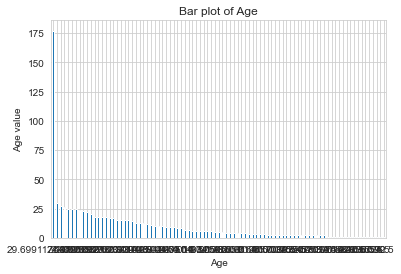

In [94]:
plt.xlabel("Age")
plt.ylabel("Age value")
plt.title("Bar plot of Age")
vc = titanic["Age"].value_counts()
vc.plot.bar(rot=0)

# Pie chart diagram

<AxesSubplot:title={'center':'Bar plot of Age'}, xlabel='Age', ylabel='Age'>

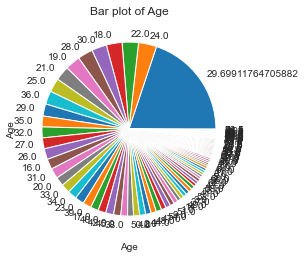

In [95]:
plt.xlabel("Age")
plt.ylabel("Age value")
plt.title("Bar plot of Age")
vc = titanic["Age"].value_counts()
vc.plot.pie(rot=0)

# Plotting using Histogram and Bar chart

<AxesSubplot:title={'center':'Bar plot of Age'}, xlabel='Age value', ylabel='Frequency'>

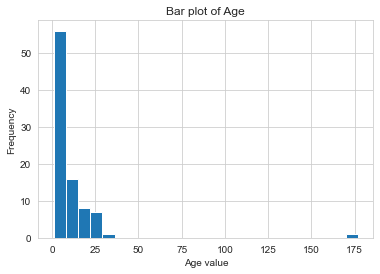

In [96]:
plt.xlabel("Age value")
plt.ylabel("Age")
plt.title("Bar plot of Age")
vc = titanic["Age"].value_counts()
vc.plot.hist(rot=0, bins= 25)

<AxesSubplot:title={'center':'Bar plot of Sex'}, xlabel='Sex', ylabel='Sex count'>

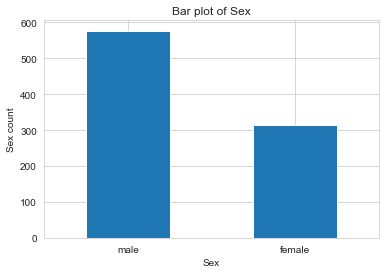

In [97]:
plt.xlabel("Sex")
plt.ylabel("Sex count")
plt.title("Bar plot of Sex")
vc = titanic["Sex"].value_counts()
vc.plot.bar(rot=0)

<AxesSubplot:title={'center':'Bar plot of Pclass'}, xlabel='Pclass', ylabel='Pclass count'>

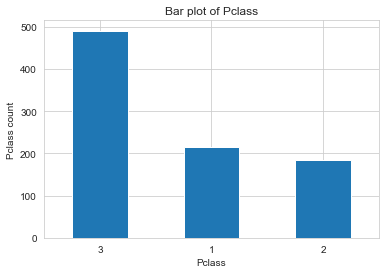

In [98]:
plt.xlabel("Pclass")
plt.ylabel("Pclass count")
plt.title("Bar plot of Pclass")
vc = titanic["Pclass"].value_counts()
vc.plot.bar(rot=0)

# Pie Chart Sample

<AxesSubplot:title={'center':'Pie chart of Pclass'}, xlabel='Pclass', ylabel='Pclass'>

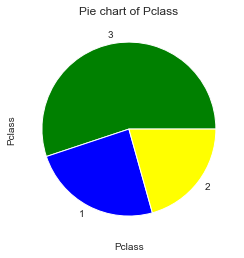

In [99]:
plt.xlabel("Pclass")
plt.ylabel("Pclass count")
plt.title("Pie chart of Pclass")
vc = titanic["Pclass"].value_counts()
vc.plot.pie(rot=0, colors = ["green", "blue", "yellow"])

# Seaborn Analysis

<AxesSubplot:xlabel='Age', ylabel='count'>

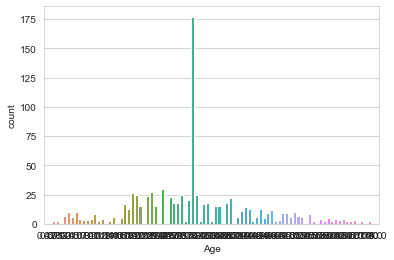

In [100]:
sb.countplot(x="Age", data = titanic)

<AxesSubplot:xlabel='Age', ylabel='Count'>

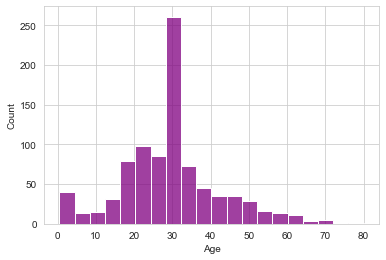

In [101]:
sb.histplot(data = titanic, x="Age", bins = 20, color ="purple")

<AxesSubplot:xlabel='Sex', ylabel='count'>

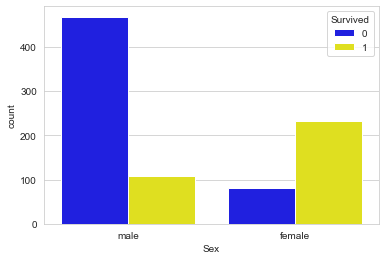

In [102]:
sb.countplot(data = titanic, x= "Sex", palette = ["blue", "yellow"], hue = "Survived")

# Correlation analysis

C:\Users\VALUEDSEED\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\VALUEDSEED\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


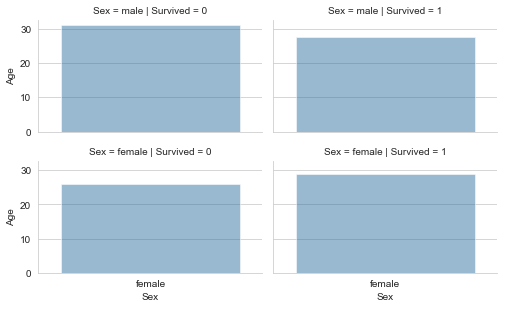

In [103]:
grid = sb.FacetGrid(titanic, row="Sex", col="Survived", size=2.2, aspect=1.6)
grid.map(sb.barplot, "Sex", 'Age', alpha=.5, ci=None)
grid.add_legend()

C:\Users\VALUEDSEED\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\VALUEDSEED\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


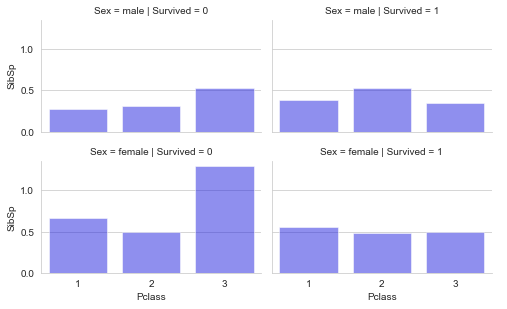

In [104]:
grid = sb.FacetGrid(titanic, row="Sex", col="Survived", size=2.2, aspect=1.6)
grid.map(sb.barplot, "Pclass", 'SibSp', alpha=.5, ci=None, color = "blue")
grid.add_legend()

<AxesSubplot:ylabel='Age'>

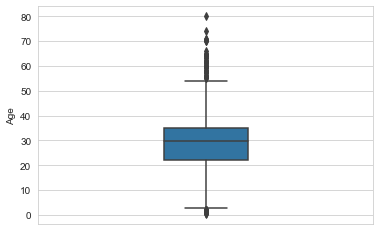

In [105]:
sb.set_style("whitegrid")


sb.boxplot(y= "Age", data = titanic, width = 0.25)

In [106]:
def plot_correlation_map( df ):
    
    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sb.diverging_palette( 220 , 10 , as_cmap = True )

    s = sb.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 })

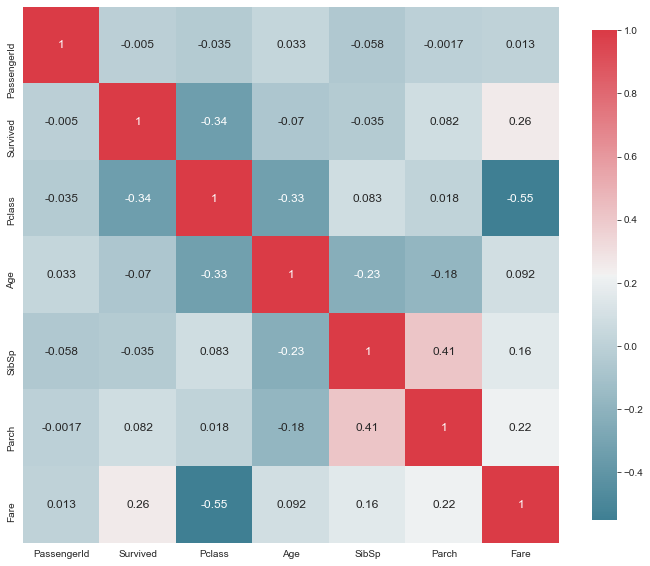

In [107]:
plot_correlation_map(titanic)

In [108]:
def plot_correlation_map( df ):
    
    corr = df.corr()

(<Figure size 864x720 with 1 Axes>, <AxesSubplot:>)

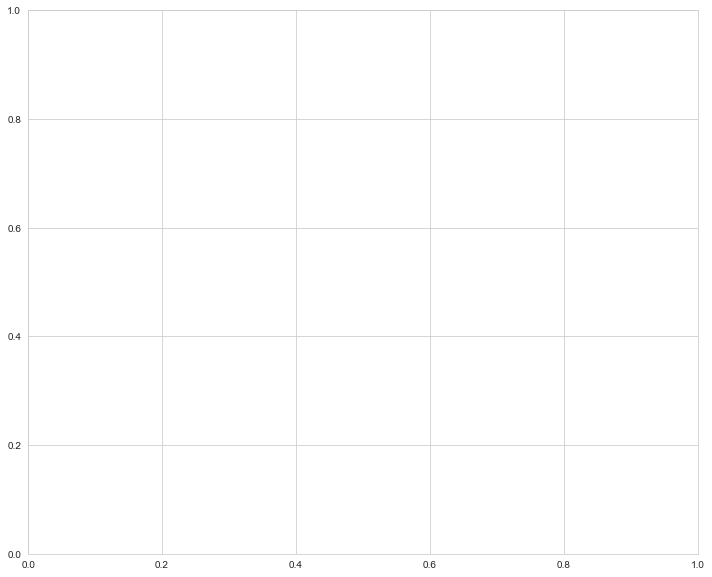

In [109]:
plt.subplots( figsize =( 12 , 10 ) )

In [110]:
 sb.diverging_palette( 220 , 10 , as_cmap = True )

In [111]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


C:\Users\VALUEDSEED\anaconda3\lib\site-packages\seaborn\matrix.py:255: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(x, y, annotation, **text_kwargs)


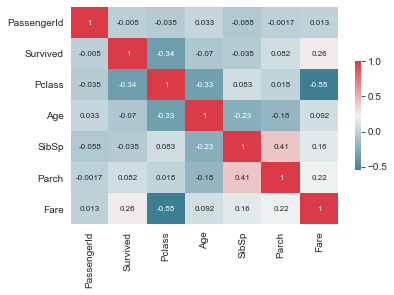

In [112]:
s = sb.heatmap(titanic.corr(), 
              cmap = sb.diverging_palette(220, 10, as_cmap = True),
              square = False,
              cbar_kws = {"shrink" : .5},
               #ax = plot.subplots(figsize = (12,10))
              annot = True,
              annot_kws = {"Fontsize" : 8})

In [113]:
def plot_correlation_map( df ):
    
    corr = df.corr()

In [114]:
plot_correlation_map(titanic[["Age", "Pclass", "Survived", "Fare"]])

# comment on the table
1. There is a significant relationship (+0.26) between Fare and the number of people that surviived the titanic wreck.
2. The Age and Pclass is not dependent on the number of survivals (it records a negative correlation of -0.07 and -0.34 respectively). Though, your survival rate is not a determinant of Pclass. 
3. Passengers with "SibSp" and "Parch" has some level of survival rate just that "SibSp" is -0.035<0 while "Parch" is 0.052>0

Use of Groupby Function: Survived and Pclass

In [141]:
t4 = titanic.groupby(["Survived", "Pclass"]).agg(total = ("Survived", "count"))
t4

total
Survived Pclass       
0        1          80
         2          97
         3         372
1        1         136
         2          87
         3         119

Use of Groupby Function: Survived, Fare, Age, SibSp, and Parch

In [116]:
t3 = titanic.groupby(["Survived", "Fare", 
                      "Age", "SibSp", "Parch"]).agg(total = ("Survived", "count"))
t3

total
Survived Fare     Age       SibSp Parch       
0        0.0000   19.000000 0     0          1
                  29.699118 0     0          8
                  36.000000 0     0          1
                  38.000000 0     0          1
                  39.000000 0     0          1
...                                        ...
1        262.3750 21.000000 2     2          1
         263.0000 23.000000 3     2          1
                  24.000000 3     2          1
         512.3292 35.000000 0     0          2
                  36.000000 0     1          1

[756 rows x 1 columns]

Calculating the % rate of Survival and non Survival Using Pclass

In [117]:
lis1 = ["{:,.2%}".format(r/t4["total"][:3].sum()) for r in t4["total"][:3]]
lis1

['14.57%', '17.67%', '67.76%']

In [118]:
lis = ["{:,.2%}".format(r/t4["total"][3:].sum()) for r in t4["total"][3:]]
lis

['39.77%', '25.44%', '34.80%']

In [119]:
t5 = lis +lis1
t5

['39.77%', '25.44%', '34.80%', '14.57%', '17.67%', '67.76%']

Extending the columns 

In [120]:
lis1.extend(lis)

lis1

['14.57%', '17.67%', '67.76%', '39.77%', '25.44%', '34.80%']

In [121]:
t4["Percentage"] = lis1

t4

total Percentage
Survived Pclass                  
0        1          80     14.57%
         2          97     17.67%
         3         372     67.76%
1        1         136     39.77%
         2          87     25.44%
         3         119     34.80%

In [122]:
t4.dropna(axis = 0, how = "any", inplace = True)

In [123]:
t4

total Percentage
Survived Pclass                  
0        1          80     14.57%
         2          97     17.67%
         3         372     67.76%
1        1         136     39.77%
         2          87     25.44%
         3         119     34.80%

Changing Titles from an existing title to a new title

In [124]:
Title_D = {         "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":       "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master",

                    }

In [127]:
Title_D.values()

dict_values(['Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Royalty', 'Royalty', 'Royalty', 'Royalty', 'Royalty', 'Royalty', 'Miss', 'Miss', 'Miss', 'Mrs', 'Mrs', 'Mrs', 'Master'])

In [125]:
Title_D.keys()

dict_keys(['Capt', 'Col', 'Major', 'Dr', 'Rev', 'Jonkheer', 'Don', 'Sir', 'Lady', 'the Countess', 'Dona', 'Mme', 'Mlle', 'Miss', 'Ms', 'Mr', 'Mrs', 'Master'])

In [130]:
old_title = []
new_title = []


for name in titanic["Name"]:
    for t, u in zip(Title_D.keys(), Title_D.values()):
        t = t+ '.'
        if t in name:
            old_title.append(t)
            new_title.append(u)

In [131]:
len(old_title) == len(titanic)

True

In [132]:
len(new_title) == len(titanic)

True

Appending the columns of both the old and new title to the table

In [133]:
titanic["old_title"] = old_title

titanic["new_title"] = new_title


titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,old_title,new_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B42,S,Mr.,Mrs
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs.,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B42,S,Miss.,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs.,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B42,S,Mr.,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B42,S,Rev.,Officer
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Miss.,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B42,S,Miss.,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Mr.,Mrs


Plotting a bar plot using the new title and Survived

<AxesSubplot:title={'center':'Bar plot of New Title'}, xlabel='new_title', ylabel='Survived'>

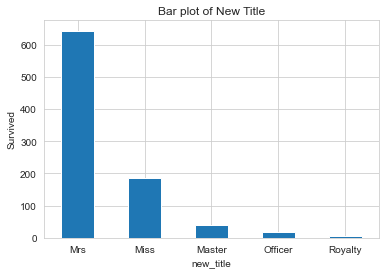

In [134]:
plt.xlabel("new_title")
plt.ylabel("Survived")
plt.title("Bar plot of New Title")
vc = titanic["new_title"].value_counts()
vc.plot.bar(rot=0)

Appending FamilySize to the Table

In [135]:
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]

In [136]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,old_title,new_title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B42,S,Mr.,Mrs,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs.,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B42,S,Miss.,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs.,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B42,S,Mr.,Mrs,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B42,S,Rev.,Officer,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Miss.,Miss,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B42,S,Miss.,Miss,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Mr.,Mrs,0


Creating a countplot

<AxesSubplot:xlabel='new_title', ylabel='count'>

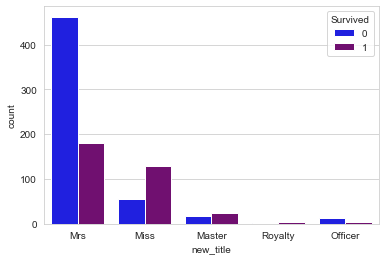

In [140]:
sb.countplot(data = titanic, x= "new_title", palette = ["blue", "purple"], hue = "Survived")

Obtaining the correlation of the table

In [137]:
def plot_correlation_map( df ):
    
    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sb.diverging_palette( 220 , 10 , as_cmap = True )

    s = sb.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 })

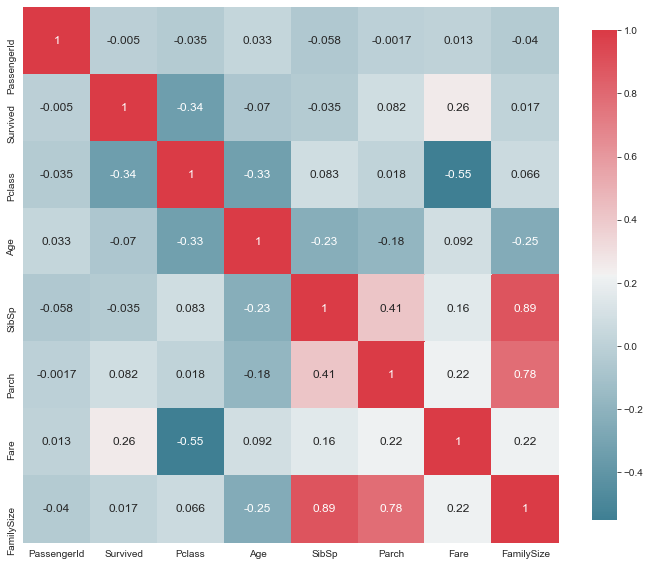

In [138]:
plot_correlation_map(titanic)